In [4]:
# ===========================
# IMPORTING LIBRARIES AND LOADING DATA
# ===========================
import pandas as pd
df=pd.read_csv('CoffeeShop.csv')

df.head()

,Day,Morning Sales ($),Afternoon Sales ($),Evening Sales ($),Snacks Sales ($),Total Customers,Promo Active (Yes/No),Total Sales,Date
0,Monday,120,200,150,80,120,No,550,05/04/2025
1,Tuesday,130,300,160,120,150,No,710,06/04/2025
2,Wednesday,140,250,180,100,140,No,670,07/04/2025
3,Thursday,150,400,200,150,180,Yes,900,08/04/2025
4,Friday,200,450,300,200,220,Yes,1150,10/04/2025


In [ ]:
# Checking missing values in each column
missing_values = df.isnull().sum()
missing_values[missing_values > 0]  


Series([], dtype: int64)

In [ ]:
# Checking for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


duplicates = df[df.duplicated()]
print(duplicates)


Number of duplicate rows: 0
Empty DataFrame
Columns: [Day, Morning Sales ($), Afternoon Sales ($), Evening Sales ($), Snacks Sales ($), Total Customers, Promo Active (Yes/No), Total Sales, Date]
Index: []


In [ ]:
# Checking data types
print(df.dtypes)

# Converting 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Confirming conversion
print(df.dtypes)


Day                      object
Morning Sales ($)         int64
Afternoon Sales ($)       int64
Evening Sales ($)         int64
Snacks Sales ($)          int64
Total Customers           int64
Promo Active (Yes/No)    object
Total Sales               int64
Date                     object
dtype: object
Day                              object
Morning Sales ($)                 int64
Afternoon Sales ($)               int64
Evening Sales ($)                 int64
Snacks Sales ($)                  int64
Total Customers                   int64
Promo Active (Yes/No)            object
Total Sales                       int64
Date                     datetime64[ns]
dtype: object


In [8]:
df.head()

,Day,Morning Sales ($),Afternoon Sales ($),Evening Sales ($),Snacks Sales ($),Total Customers,Promo Active (Yes/No),Total Sales,Date
0,Monday,120,200,150,80,120,No,550,2025-04-05
1,Tuesday,130,300,160,120,150,No,710,2025-04-06
2,Wednesday,140,250,180,100,140,No,670,2025-04-07
3,Thursday,150,400,200,150,180,Yes,900,2025-04-08
4,Friday,200,450,300,200,220,Yes,1150,2025-04-10


C:\Users\belin\AppData\Local\Temp\ipykernel_9624\240603478.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('Greens')
C:\Users\belin\AppData\Local\Temp\ipykernel_9624\240603478.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Time of Day', y='Total Sales', data=bar_df, palette=shades)


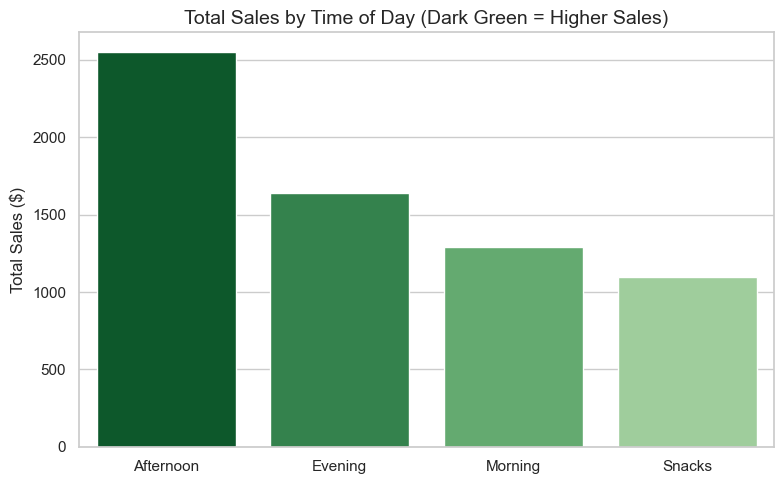

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np

# 1. Creating and sorting sales data
time_sales = {
    'Morning': df['Morning Sales ($)'].sum(),
    'Afternoon': df['Afternoon Sales ($)'].sum(),
    'Evening': df['Evening Sales ($)'].sum(),
    'Snacks': df['Snacks Sales ($)'].sum()
}
sorted_time_sales = dict(sorted(time_sales.items(), key=lambda item: item[1], reverse=True))

# 2. Creating a DataFrame for Seaborn
import pandas as pd
bar_df = pd.DataFrame({
    'Time of Day': list(sorted_time_sales.keys()),
    'Total Sales': list(sorted_time_sales.values())
})

# 3. Generating green shades (darkest = highest sales)
cmap = get_cmap('Greens')
shades = [cmap(i) for i in np.linspace(0.9, 0.4, len(bar_df))]


sns.set_theme(style="whitegrid")

# 5. Plotting with custom colors
plt.figure(figsize=(8,5))
sns.barplot(x='Time of Day', y='Total Sales', data=bar_df, palette=shades)
plt.title('Total Sales by Time of Day (Dark Green = Higher Sales)', fontsize=14)
plt.xlabel('')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()


C:\Users\belin\AppData\Local\Temp\ipykernel_4224\295708513.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('Blues')
C:\Users\belin\AppData\Local\Temp\ipykernel_4224\295708513.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day', y='Total Sales', data=sales_day_df, palette=shades)


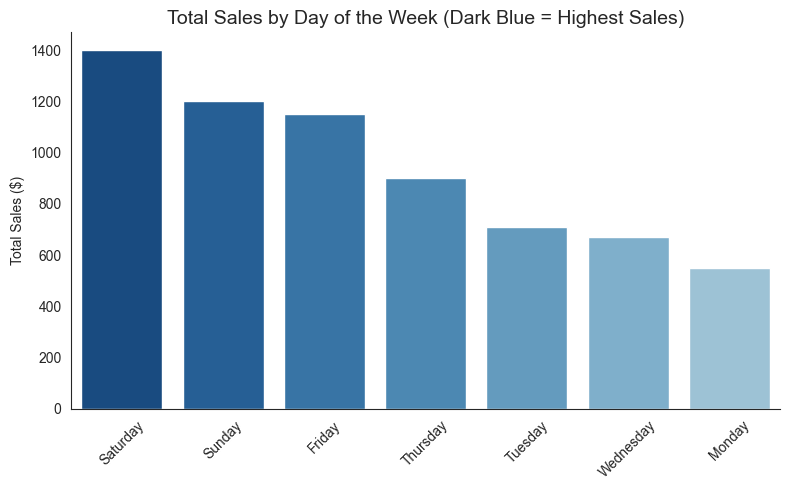

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np

# 1. Grouping and sorting sales
sales_by_day = df.groupby('Day')['Total Sales'].sum().sort_values(ascending=False)
sales_day_df = sales_by_day.reset_index()

# 2. Creating a reversed blue gradient using Matplotlib's 'Blues' colormap
cmap = get_cmap('Blues')
# Highest value = darkest (0.9), lowest = lightest (0.4)
shades = [cmap(i) for i in np.linspace(0.9, 0.4, len(sales_day_df))]

# 3. Plot
sns.set_style("white")  # No grid
plt.figure(figsize=(8,5))
sns.barplot(x='Day', y='Total Sales', data=sales_day_df, palette=shades)

# 4. Customizing the plot
plt.title('Total Sales by Day of the Week (Dark Blue = Highest Sales)', fontsize=14)
plt.ylabel('Total Sales ($)')
plt.xlabel('')
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()


In [18]:
df.groupby('Day')['Total Customers'].sum().sort_values(ascending=False)


Day
Saturday     300
Sunday       250
Friday       220
Thursday     180
Tuesday      150
Wednesday    140
Monday       120
Name: Total Customers, dtype: int64

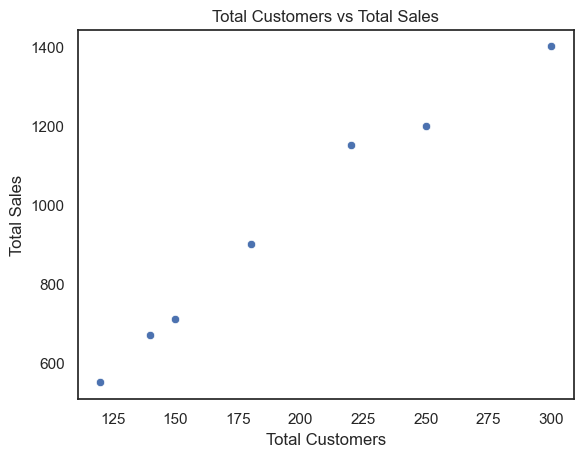

Correlation coefficient: 0.99


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot to visualize relationship
sns.scatterplot(x='Total Customers', y='Total Sales', data=df)
plt.title('Total Customers vs Total Sales')
plt.show()

# Calculate correlation coefficient (Pearson)
corr = df['Total Customers'].corr(df['Total Sales'])
print(f'Correlation coefficient: {corr:.2f}')


C:\Users\belin\AppData\Local\Temp\ipykernel_9624\239241311.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Promo Active (Yes/No)', y='Total Sales', data=df, palette='Pastel1')


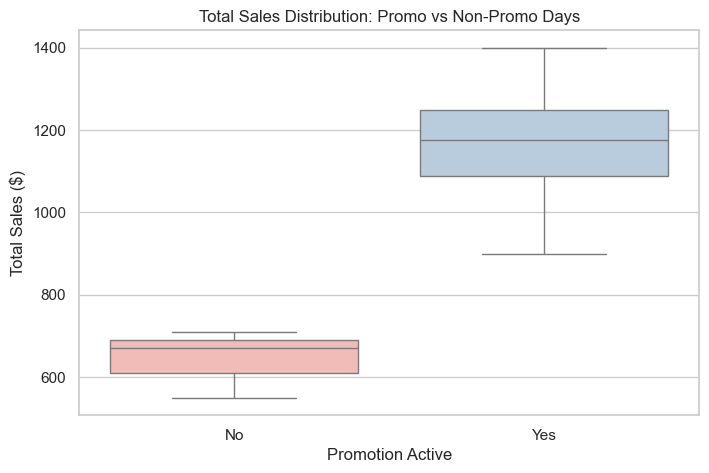

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(8,5))
sns.boxplot(x='Promo Active (Yes/No)', y='Total Sales', data=df, palette='Pastel1')
plt.title('Total Sales Distribution: Promo vs Non-Promo Days')
plt.ylabel('Total Sales ($)')
plt.xlabel('Promotion Active')
plt.show()
